## Investigating a Dataset - Titanic Data

Data was obtained from the Kaggle website: [Titanic Data](https://www.kaggle.com/c/titanic/data)

### Question(s): What variables could have strong relationship on Survival?
### What variables increases your chances of not surviving the ship wreck?


### Imports:

In [1]:
#import all necessary packages
%pdb 
%matplotlib inline                 
import pandas as pd                 #pd is a convention
import numpy as np                  #np is a convention
import matplotlib.pyplot as plt    #plt is a convention
import seaborn as sns              #Improves visualizations
from IPython.core.interactiveshell import InteractiveShell            #Allows value of multiple statements at once
InteractiveShell.ast_node_interactivity = "all"

Automatic pdb calling has been turned ON


### Variable Descriptions:

   ### Variable      Definition            Key
    survival      Survival         0 = No, 1 = Yes

    pclass      Ticket class     1 = 1st, 2 = 2nd, 3 = 3rd

    sex          Sex

    Age         Age 

    sibsp      # of siblings / spouses aboard the Titanic
    
    parch      # of parents / children aboard the Titanic	

    ticket     Ticket number
    
    fare       Passenger fare

    cabin      Cabin number

    embarked   Port of Embarkation	C = Cherbourg, Q = Queenstown, S=Southampton

### Variable Details:
**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


### Variable Classification:

***Dependent variable:*** Survived

***Independent variable's:*** Pclass, Gender, and Fare

### Importing Data:

In [2]:
titanic_data = pd.read_csv('titanic_data.csv')      #CSV file uploaded to a DataFrame
titanic_data.head()                                 # prints out the first 5 lines
titanic_data.tail()                                 # prints out the last 5 lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
titanic_data.shape                #891 rows and 12 columns

print('Data Types:')
titanic_data.dtypes               #data types in each column

print('Contents of Data Set:')
titanic_data.info()                #The contents of the data set

(891, 12)

Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Contents of Data Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
def missingvaluecol(data):                            #Creating a function to find NAN's in each column
    return sum(data.isnull())

print('Missing Values in each Column:')
titanic_data.apply(missingvaluecol, axis=0)


Missing Values in each Column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have created a function to apply to each column of the DataFrame to find missing values.
We found that there are 177 passenger age's missing, 687 passenger cabin numbers missing, and 2 port of embarkation missing.

Above we printed out the first 5 rows and their respective columns of the Titanic Data set, based on the shape of the data set there are 891 passengers and 12 columns of criteria. We also see that the variables have different data types such as Integers, Objects,and Floats.

To understand the data provdided we apply the describe function to the DataFrame to obtain summary statistics.

When trying to obtain the stats from each column we noticed that the missing values from the Age column were causing a problem when trying to get the quartile's. The 'na' values from the Age column were removed along with their corresponding rows, we do not have a good basis to imput the data.


A salient point is that the Sex column is an object. We would to try to convert this into a numeric value if we want to use to further investigate. We attribute male to a value of 1 and female to a value of 0.

In [5]:
titanic_data['Gender'] = np.where(titanic_data['Sex'] == 'male', 1, 0) #A new variable based on Gender

In [26]:
titanic_data['Survival'] = titanic_data.Survived.map({0 : 'Died', 1 : 'Survived'})  #Get use to providing more descriptive labels, attaching a new series to the Dataframe
titanic_data['Class'] = titanic_data.Pclass.map({1 : 'Upper Class', 2 : 'Middle Class', 3 : 'Lower Class'})     #dataframe.series.map - map values of series

In [28]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Survival,Class,Count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Died,Lower Class,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,Survived,Upper Class,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Survived,Lower Class,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,Survived,Upper Class,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Died,Lower Class,1


In [8]:
titanic_data.dropna(subset=['Age'],inplace=True)  #Dropped the rows that had NAN'S in the "Age"column

We also noticed that the PassengerID, Cabin, and Ticket columns can be removed from the Titanic Data Set, it will help our code run faster.

In [8]:
titanic_data.drop(['PassengerId','Cabin','Ticket'],axis=1, inplace=True)  #Delete's PassengerID,Cabin, and Ticket column inplace

In [9]:
titanic_data.head()          #Print first 5 rows to confirm that the columns were deleted appropriately

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Survival,Class
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Died,Third Class
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,Survived,Upper Class
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Survived,Third Class
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,Survived,Upper Class
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Died,Third Class


### Statistics of each column:

In [10]:
titanic_data.describe() #provides summary statistics without the NA values in 'Age' column

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Above we have trimmed the data removing rows that contain NAN's in the Age column. We notice that the data now contains 714 passengers. 


The Age column indicates that on average the passengers were about 29.70 years old. The median value that is shown in the (50 percent quartile) indicates that the Age is 28 years old of the passengers. We also notice that the youngest passenger aboard is .42 less than a year old and the oldest passenger aboard is 80 years old.

The Fare column that provides information on the price paid to board the Titanic shows that on average the passengers paid about 34 shillings. We also notice that standard deviation is large showing how close the relative data points are from the mean, the std shows that it is 52.91 standard deviations meaning that the values are spread out over a wider range of values. We wouldn't use the mean to get a bearing on the average passenger fare since it is susceptible to extreme values, instead we will look at the median(50% quartile) this shows that passengers paid about 15.74 shillings to board the ship. We also note the disparity in the price range of the fare by looking at the minimum passenger fare being 0 and the maximum passenger fare is about 512.33 shillings. It is safe to assume that the passengers that didn't pay were probably working or toddlers. The 512.33 shillings was probably paid by someone pertaining to the upper-class.



### Bar graph:

Class
Lower Class     491
Middle Class    184
Upper Class     216
Name: Count, dtype: int64


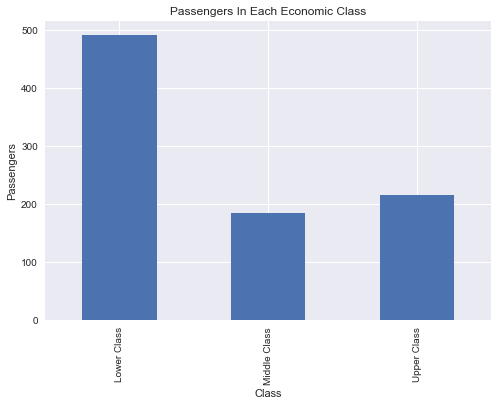

In [50]:
titanic_data['Count'] = 1        #attaches Series Count to df to ensure every row is counted once 
countClass = titanic_data.groupby(['Class']).count()['Count']  #groupby method groups by the categories in the variable, that it is call on, the count at the end just selects variable from the created dataframe   
passengers_class = countClass.plot(kind='bar')
passengers_class.set_title('Passengers In Each Economic Class')
passengers_class.set_ylabel('Passengers')
print countClass

We have provided two bar charts that clearly depict the amount of passengers that belong to each Economic class and whether they survived the ship wreck. The counts are provided above: most of the passengers belonged to the lower class and did not survive the ship wreck. 

We will proceed by creating a scatter plot of each of the continuous variables within the data set to see if there is any noticeable relationships. This will be done by examining the associations with Fare and Age. This will help us determine if there is any superflous relationships with the variables of interest. 

### Scatter Plot:

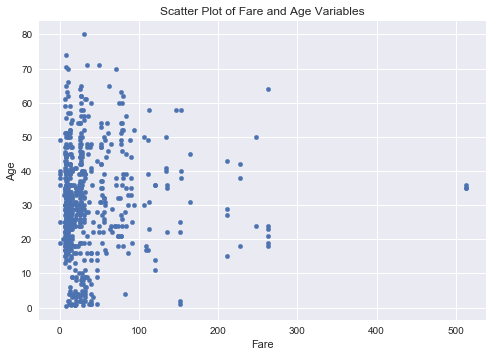

In [54]:
scatterplot_fareage = titanic_data.plot(kind='scatter', x='Fare', y='Age')
scatterplot_fareage.set_title('Scatter Plot of Fare and Age Variables')

We notice that the majority of passengers paid an amount less than 100 shillings, there is not a clear relationship between these variables. This can probably be a result of passengers coming with their parents who would be responsible to pay for the fare.

### Correlations:

Next we see if any variables are related by creating a correlation matrix to inspect the relationships between the variables at once. 

In [20]:
titanic_data[['Age','Fare',]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


We have created a correlation matrix that omits the categorical variables within the dataset. We have used Pearson's correlation method to compute these statistics. Based on the scatterplot these results corroborate that there is a weak relationship between the age of the passengers and the amount paid to embark the ship. 

In [16]:
pd.crosstab(titanic_data["Pclass"],titanic_data["Survived"],margins=True)
pd.crosstab(titanic_data["Fare"],titanic_data["Survived"],margins=True)
pd.crosstab(titanic_data["Gender"],titanic_data["Survived"],margins=True)

Survived,0,1,All
Pclass,,,
1,64,122,186
2,90,83,173
3,270,85,355
All,424,290,714


Survived,0,1,All
Fare,,,
0.0,6,1,7
4.0125,1,0,1
5.0,1,0,1
6.2375,1,0,1
6.4375,1,0,1
6.45,1,0,1
6.4958,2,0,2
6.75,2,0,2
6.975,1,1,2


Survived,0,1,All
Gender,,,
0,64,197,261
1,360,93,453
All,424,290,714


We notice that based on Pclass we see that the majority of upper class passengers did not survived. This could be that during these times they were given preferential treatment exposing them to a riskier area. We also note that the most people survived belonged to the lower class. 

We also notice that based on Gender we see that the majority of survivors were Females. This will probably be because of the given times of the incident meaning men would be the last ones to evacuate the ship.

### Logit Model:

We will now construct a logistic model with the variables that have the strongest relationship with the dependent variable. The dependent variable in this model would be Survived and the independent variables would be Pclass, Gender, and Fare. The choice for a logistic model is that the dependent variable is categorical. 

In [70]:
import statsmodels.api as sm
import pylab as pl

We first create dummy variables for class and gender in order to control for these and show the impact of a particular class or gender on the chances of surviving.

In [71]:
dummies_class = pd.get_dummies(titanic_data['Pclass'], prefix='Pclass')
print dummies_class.head()
dummies_gender = pd.get_dummies(titanic_data['Gender'], prefix='Gender')
print dummies_gender.head()

   Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1
   Gender_0  Gender_1
0         0         1
1         1         0
2         1         0
3         1         0
4         0         1


Now before we proceed we must create a dataframe that is going to contain the dummy variables,the continous variable Fare, and the dependent variable Survived. 

In [97]:
columns_reg = ['Survived','Fare']
dat = titanic_data[columns_reg].join(dummies_class.ix[:, 'Pclass_2':]) #we start at the second column to aviod mulit-colinearity
dat['Intercept'] =1.0                          #adding an intercept 
data1 = dat.join(dummies_gender.ix[:,'Gender_1':])
data1.head()                            #Included the Gender_1 column that contains dummies for Gender 

,Survived,Fare,Pclass_2,Pclass_3,Intercept,Gender_1
0,0,7.2500,0,1,1.0,1
1,1,71.2833,0,0,1.0,0
2,1,7.9250,0,1,1.0,0
3,1,53.1000,0,0,1.0,0
4,0,8.0500,0,1,1.0,1


In [102]:
columns = data1.columns[1:]
logit = sm.Logit(data1['Survived'],data1[columns])
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.470231
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Apr 2017   Pseudo R-squ.:                  0.3038
Time:                        19:25:22   Log-Likelihood:                -335.74
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 3.459e-62
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Fare           0.0022      0.002      0.945      0.345        -0.002     0.007
Pclass_2      -0.8005      0.289     -2.768      0.006        -1.367    -0.234
Pclass_3      -1.8308      0.281     -6.509      0.000        -2.382    -1.280
Intercept      2.1501      0.306      7.029      0.000         1.551     2.750
Gender_1      -2.5529      0.204    -12.494      0.000        -2.953    -2.152
==============================================================================
"""

### Tentative Results:

The logit regression model above was estimated using Maximum Likelihood Estimation(MLE) using the available data to form parameters for each of the variables. We see that the output table provides us the coefficients for the model associated with each variable. The z-score gives us an idea of how well the coefficients fit into the model. The overall fit of the model is given by the Psuedo R-square the value is .3038, 1 is the upper bound meaning that the independent variables are perfectly explaining the dependent variable. If R-square approaches 1 this means that the values of the data points converging to the regression line. 

We notice that there is an inverse relationship between the probability of surviving and the economic class that a passenger belongs to. The probability of surviving the Titanic Ship wreck based on this data is higher for passengers that belong to the higher class and it lowers as you descend classes Middle classes and Lower classes holding other variables constant. If we could have included a variable that would segment the ship into different areas where the passengers of a particular class were located, this could raise the statistical robustness of our variables. We also notice that there is an inverse relationship between the probability of surviving and the Gender a passenger pertains to. The probability of surviving the Titanic Ship wreck based on this data is lower for passengers that are males holding other variables constant.

We also take a look at the t-stat for the coefficients within the model. We notice that t-stat for Gender_1 is 12.494 meaning that it is statistically significant at the 1 percent level. This gives us a good reason supporting the creation of dummy variables for this categorical variable to include in the model. We also notice that the 2 dummy variables for classes are statistically significant Middle class 2.768 and Lower Class 6.509 these are both statistically significant at the 1 percent level. We also notice that the Fare variable is not statistically significant at 1, 5, 10 percent level. 





Based on these results we will briefly provide an explanation on the relationships on the independent variables to the dependent variables. We notice that class has an inverse relationship with Survived. We also notice that Gender has an inverse relationship with Survived. We also note that Fare has positive relationship with Survived. If you pertained to the middle class you had less of a chance to survive. We also notice that you also have even less of a chance if you belonged to the lower class. This is made apparent based on the coefficients of the independent varibles in the model. If you purchased an expensive boarding pass you have a higher chance of surviving. If you are a male you have less of a chance surviving the ship wreck, this can be said by looking at the negative sign of the coefficient for the Gender_1 variable. 

### Limitations:


As we noted earlier the dataset contains missing values in the Age column, we have ommited the corresponding rows(passengers). This eliminates 177 passengers that have their age missing, this can hinder our analysis this can skew the data points into a particular direction. There could have been other potential variables, proxy variables that could have been used in the logit model to reduce biasness from each of the independent variables. They could have been used as control variables, for instance a variable that divided the ship into 4 different regions. 